### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from datasist.structdata import detect_outliers
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

### Data Analysis and Cleaning

In [3]:
# Reading the train dataset and displaying first few rows of data

train_data = pd.read_csv('./data/train.csv')
train_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


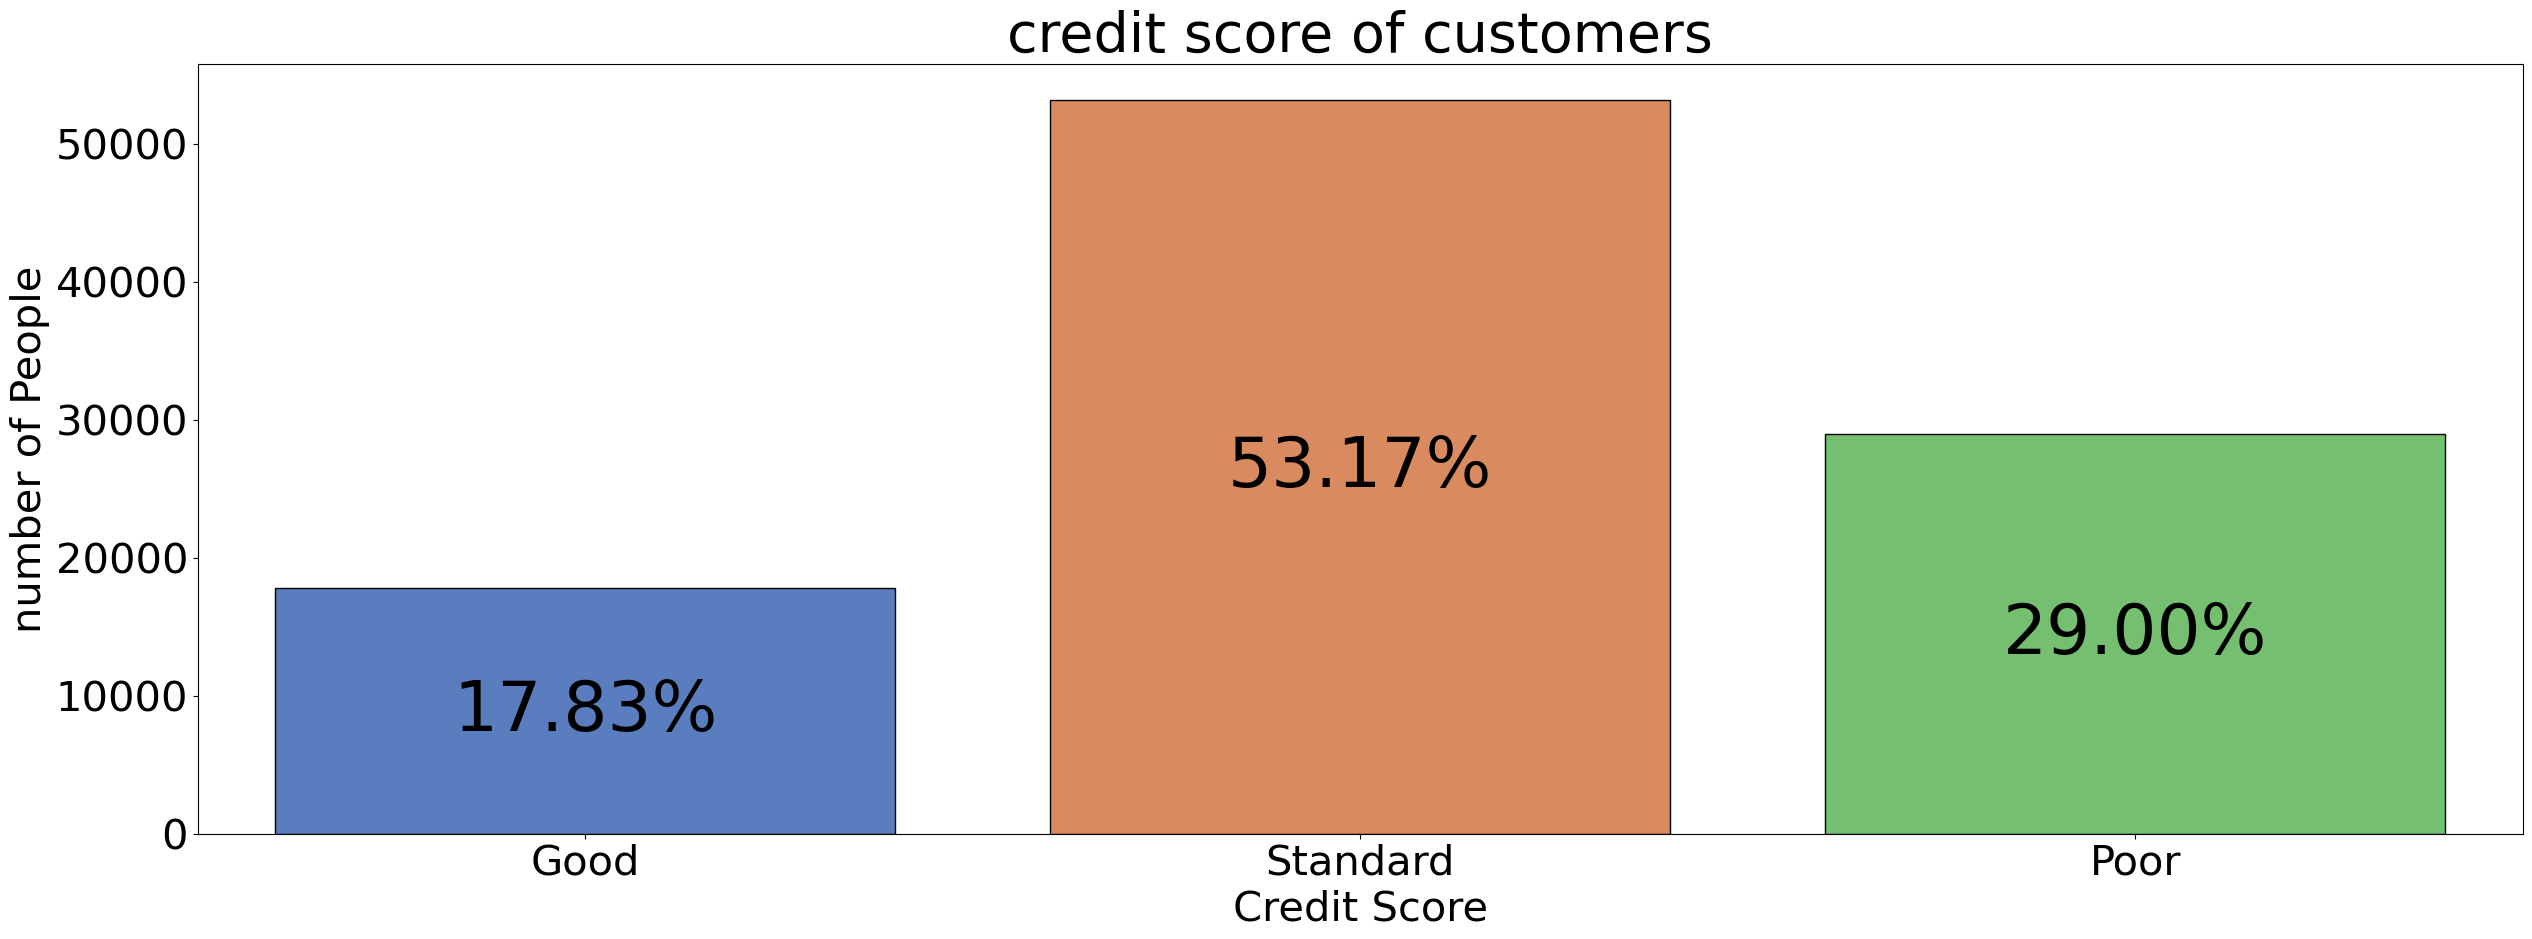

In [4]:
plt.figure(figsize=(30,10))

total = len(train_data)
percentages = train_data['Credit_Score'].value_counts(normalize=True) * 100

ax=sns.countplot(data=train_data, x="Credit_Score", edgecolor='k',palette='muted')
plt.title('credit score of customers',fontsize=40)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total * 100:.2f}%', (p.get_x() + p.get_width() / 2., height/2), fontsize=50,ha='center', va='center', color='black')# xytext=(0, -250), textcoords='offset points')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Credit Score',fontsize=30)
plt.ylabel('number of People',fontsize=30)
plt.show()

The bar chart indicates that a minority of customers (17.83%) have a good credit score, while the majority have standard (53.17%) and poor (29.00%) scores, signaling a varied creditworthiness among the customer base.

In [5]:
# Reading the test dataset and displaying first few rows of data

test_data = pd.read_csv('./data/test.csv')
test_data.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,18.31,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,6,7,2_,"Auto Loan, and Student Loan",20,NaN,11.5,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,5,13.5,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,6,7,2_,"Auto Loan, and Student Loan",21,6_,11.5,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717
49999,0x25ff1,CUS_0x942c,December,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",22,5,11.5,7.0,_,502.38,34.108530,32 Years and 2 Months,No,35.104023,220.45787812168732,Low_spent_Medium_value_payments,360.37968260123847


In [6]:
# Displaying the number of rows and columns in train, test data

train_data.shape , test_data.shape

((100000, 28), (50000, 27))

In [7]:
# Displaying data types of different columns in the data

dtypes_df = pd.concat([train_data.dtypes, test_data.dtypes], axis=1)
dtypes_df.columns = ['Train Data Types', 'Test Data Types']

print(dtypes_df)

                         Train Data Types Test Data Types
ID                                 object          object
Customer_ID                        object          object
Month                              object          object
Name                               object          object
Age                                object          object
SSN                                object          object
Occupation                         object          object
Annual_Income                      object          object
Monthly_Inhand_Salary             float64         float64
Num_Bank_Accounts                   int64           int64
Num_Credit_Card                     int64           int64
Interest_Rate                       int64           int64
Num_of_Loan                        object          object
Type_of_Loan                       object          object
Delay_from_due_date                 int64           int64
Num_of_Delayed_Payment             object          object
Changed_Credit

In [8]:
# Displaying the statistical values of train data

train_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [9]:
# Displaying the statistical values of test data

test_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


In [10]:
# Displays the number of null values in each column

train_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [11]:
# Displays the number of null values in each column

test_data.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

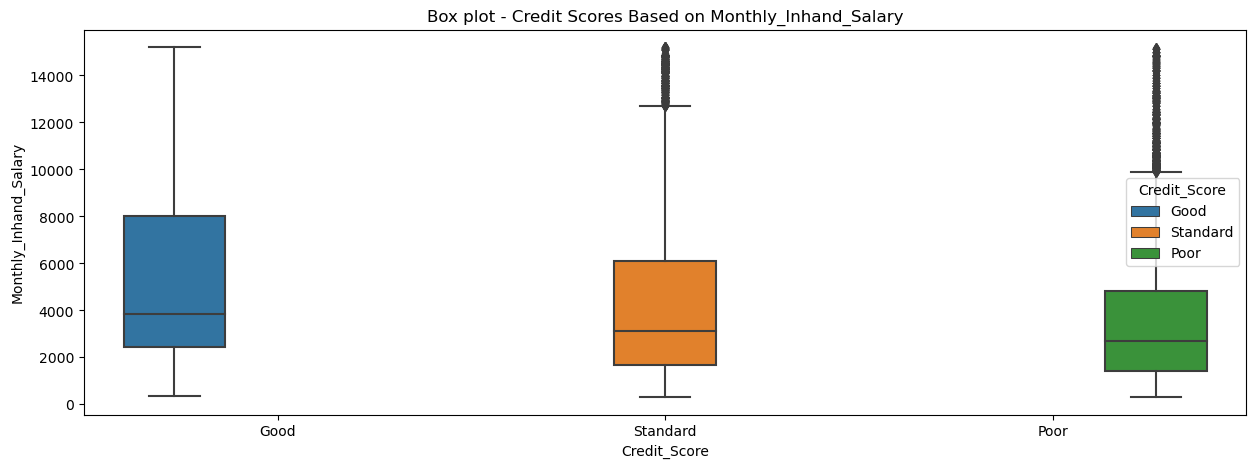

In [12]:
# Visualizing the distribution of Monthly_Inhand_Salary across different Credit Scores using a box plot.

plt.figure(figsize=(15,5))
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary',hue="Credit_Score",data = train_data)
plt.title("Box plot - Credit Scores Based on Monthly_Inhand_Salary")
plt.show()

The box plot shows variations in monthly in-hand salary across three credit score categories: Good, Standard, and Poor. Customers with good credit scores tend to have a higher median salary, while those with poor scores have a lower median salary, indicating a potential correlation between income and credit score quality.

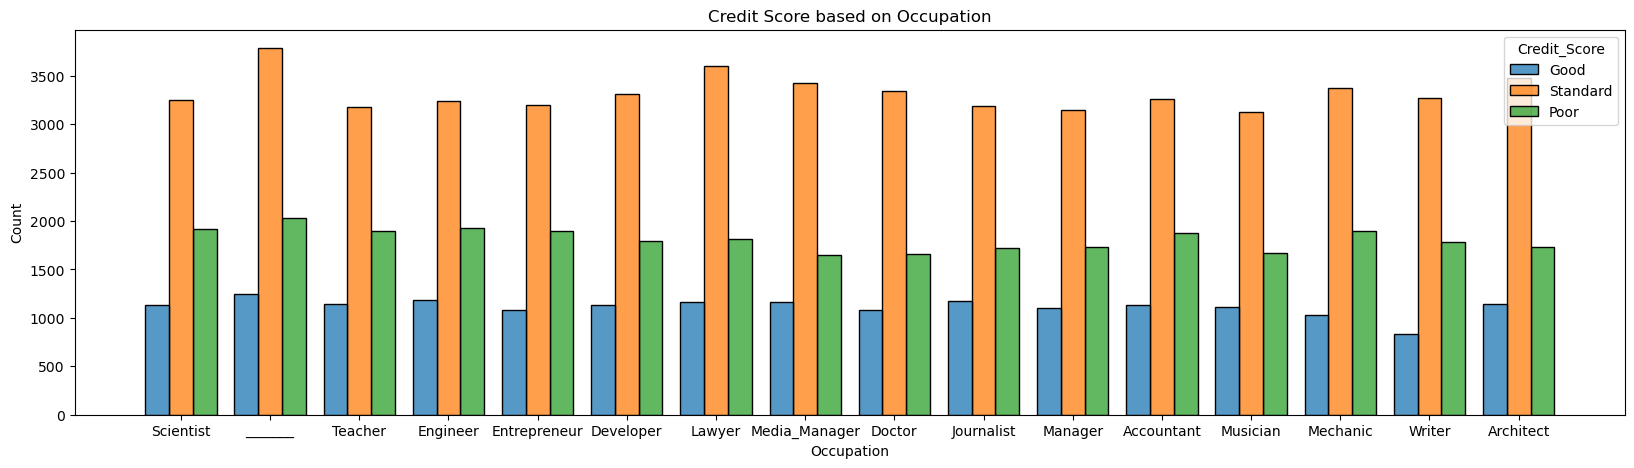

In [13]:
# Visualizing the distribution of Credit Scores based on Occupation using a histogram.

plt.figure(figsize=(20,5))
sns.histplot(data=train_data, x="Occupation", bins=range(5,85,5) ,
             hue="Credit_Score",binwidth=3, multiple="dodge",
             shrink=.8)
plt.title("Credit Score based on Occupation")
plt.show()

The clustered bar chart depicts credit score distributions across various occupations. For most professions, standard credit scores predominate, while good and poor scores vary less consistently, suggesting that occupation may have a nuanced impact on credit score classification.

In [14]:
train_data['Credit_Score'].value_counts(normalize=True)

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

In [15]:
# Removing columns 'ID', 'Name', and 'SSN' from the train_data DataFrame.
# These columns are excluded from further analysis or modeling as they are not considered relevant.

train_data = train_data.loc[:, ~train_data.columns.isin(['ID','Name','SSN'])]
train_data

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,CUS_0x942c,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [16]:
test_data = test_data.loc[:, ~test_data.columns.isin(['ID','Name','SSN'])]
test_data

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,CUS_0xd40,September,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,CUS_0xd40,October,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,CUS_0xd40,November,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,CUS_0xd40,December,24_,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,CUS_0x21b1,September,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,CUS_0x8600,December,4975,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,18.31,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,CUS_0x942c,September,25,Mechanic,39628.99,NaN,4,6,7,2_,"Auto Loan, and Student Loan",20,NaN,11.5,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,CUS_0x942c,October,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,5,13.5,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,CUS_0x942c,November,25,Mechanic,39628.99,NaN,4,6,7,2_,"Auto Loan, and Student Loan",21,6_,11.5,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [17]:
def cleaning(data):
    """
    Clean and preprocess a data entry.

    Parameters:
    - data: The data entry to be cleaned.

    Returns:
    - Cleaned and processed data entry.

    This function checks if the data is either NaN or not a string.
    If it is NaN or not a string, it returns the data as is.
    Otherwise, it removes leading and trailing underscores, spaces, double quotes, and commas.
    """
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [18]:
train_data = train_data.applymap(cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
train_data

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,CUS_0x942c,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [19]:
test_data = test_data.applymap(cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
test_data

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,CUS_0xd40,September,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,CUS_0xd40,October,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,CUS_0xd40,November,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,CUS_0xd40,December,24,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,CUS_0x21b1,September,28,NaN,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,CUS_0x8600,December,4975,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,18.31,12.0,NaN,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,CUS_0x942c,September,25,Mechanic,39628.99,NaN,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,CUS_0x942c,October,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,5,13.5,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,10000,Low_spent_Large_value_payments,349.7263321025098
49998,CUS_0x942c,November,25,Mechanic,39628.99,NaN,4,6,7,2,"Auto Loan, and Student Loan",21,6,11.5,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [20]:
train_data.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Customer_ID              100000 non-null  object
 1   Month                    100000 non-null  object
 2   Age                      100000 non-null  object
 3   Occupation               92938 non-null   object
 4   Annual_Income            100000 non-null  object
 5   Num_of_Loan              100000 non-null  object
 6   Type_of_Loan             88592 non-null   object
 7   Num_of_Delayed_Payment   92998 non-null   object
 8   Changed_Credit_Limit     97909 non-null   object
 9   Credit_Mix               79805 non-null   object
 10  Outstanding_Debt         100000 non-null  object
 11  Credit_History_Age       90970 non-null   object
 12  Payment_of_Min_Amount    100000 non-null  object
 13  Amount_invested_monthly  95521 non-null   object
 14  Payment_Behaviour    

In [21]:
test_data.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Customer_ID              50000 non-null  object
 1   Month                    50000 non-null  object
 2   Age                      50000 non-null  object
 3   Occupation               46562 non-null  object
 4   Annual_Income            50000 non-null  object
 5   Num_of_Loan              50000 non-null  object
 6   Type_of_Loan             44296 non-null  object
 7   Num_of_Delayed_Payment   46502 non-null  object
 8   Changed_Credit_Limit     48941 non-null  object
 9   Credit_Mix               40195 non-null  object
 10  Outstanding_Debt         50000 non-null  object
 11  Credit_History_Age       45530 non-null  object
 12  Payment_of_Min_Amount    50000 non-null  object
 13  Amount_invested_monthly  47729 non-null  object
 14  Payment_Behaviour        46200 non-nul

In [22]:
# Convert Customer_ID from hexadecimal string to integer if it is of object dtype
if train_data['Customer_ID'].dtype == object:
    train_data['Customer_ID'] = train_data['Customer_ID'].apply(lambda x: int(x[4:], 16))

# Convert 'Month' column to datetime format and extract the month
try:
    train_data['Month'] = pd.to_datetime(train_data['Month'], format='%B').dt.month
except ValueError:
    # If conversion to datetime fails, assume it's already in numeric format and convert to int
    train_data['Month'] = train_data['Month'].astype(int)

# Convert specific columns to appropriate data types
train_data['Age']                     = train_data.Age.astype(int)
train_data['Annual_Income']           = train_data.Annual_Income.astype(float)
train_data['Num_of_Loan']             = train_data.Num_of_Loan.astype(int)
train_data['Num_of_Delayed_Payment']  = train_data.Num_of_Delayed_Payment.astype(float)
train_data['Changed_Credit_Limit']    = train_data.Changed_Credit_Limit.astype(float)
train_data['Outstanding_Debt']        = train_data.Outstanding_Debt.astype(float)
train_data['Amount_invested_monthly'] = train_data.Amount_invested_monthly.astype(float)
train_data['Monthly_Balance']         = train_data.Monthly_Balance.astype(float)

# Similar operations for test_data
if test_data['Customer_ID'].dtype == object:
    test_data['Customer_ID'] = test_data['Customer_ID'].apply(lambda x: int(x[4:], 16))

try:
    test_data['Month'] = pd.to_datetime(test_data['Month'], format='%B').dt.month
except ValueError:
    test_data['Month'] = test_data['Month'].astype(int)

test_data['Age']                     = test_data.Age.astype(int)
test_data['Annual_Income']           = test_data.Annual_Income.astype(float)
test_data['Num_of_Loan']             = test_data.Num_of_Loan.astype(int)
test_data['Num_of_Delayed_Payment']  = test_data.Num_of_Delayed_Payment.astype(float)
test_data['Changed_Credit_Limit']    = test_data.Changed_Credit_Limit.astype(float)
test_data['Outstanding_Debt']        = test_data.Outstanding_Debt.astype(float)
test_data['Amount_invested_monthly'] = test_data.Amount_invested_monthly.astype(float)
test_data['Monthly_Balance']         = test_data.Monthly_Balance.astype(float)

In [23]:
def Month_Converter(x):
    """
    Convert a string representing a month range to the total number of months.

    Parameters:
    - x: The input string representing a month range.

    Returns:
    - Total number of months (int) or NaN if the input is null.

    This function extracts two numeric values from the input string representing a month range.
    It calculates the total number of months by multiplying the first value by 12 and adding the second value.
    If the input is null, it returns NaN.
    """
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
        return (num1 * 12) + num2
    else:
        return x

In [24]:
train_data['Payment_of_Min_Amount'].replace("NM","No",inplace=True)
test_data['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

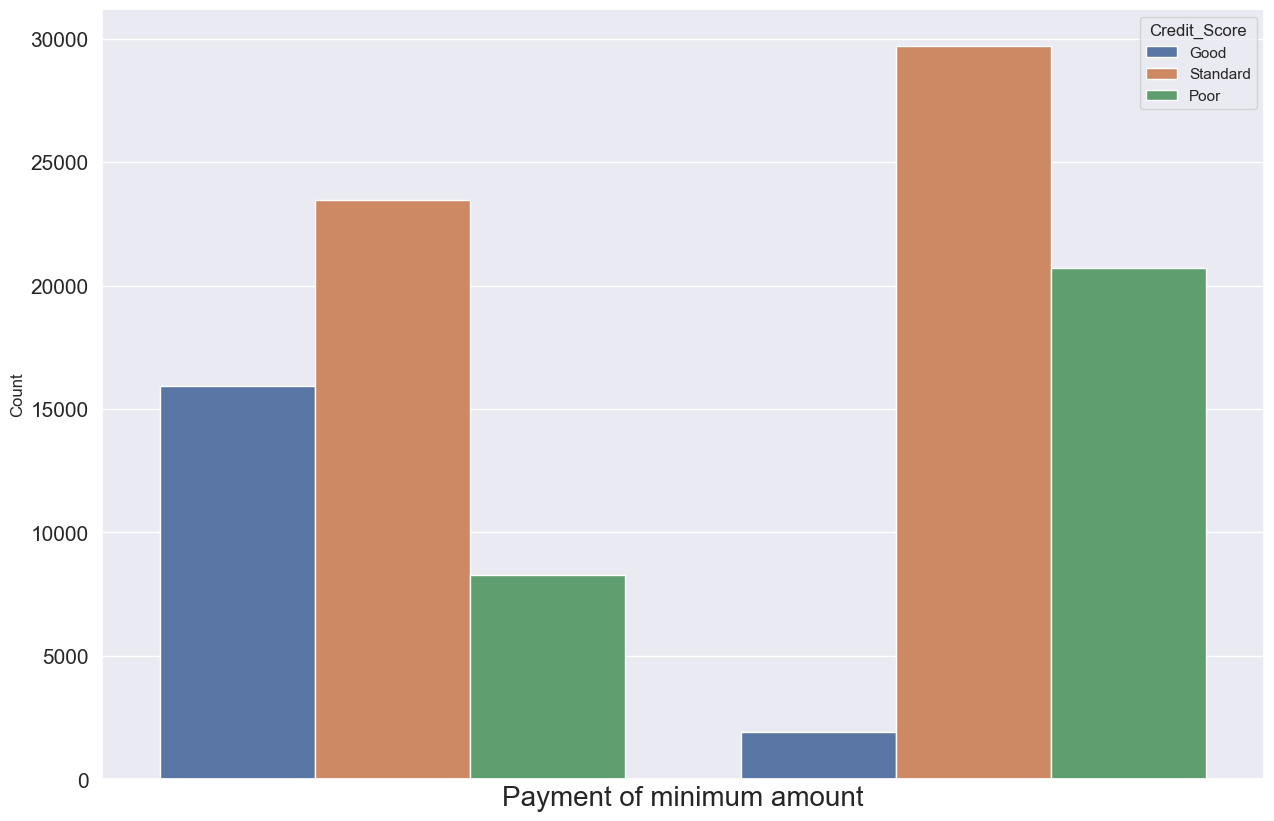

In [25]:
# Visualizing the count of Credit Scores based on Payment of Minimum Amount using a countplot.

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15, 10)})

sns.countplot(x=train_data['Payment_of_Min_Amount'], data=train_data, hue=train_data['Credit_Score'])
plt.xlabel('Payment of minimum amount', fontsize=20)
plt.ylabel('Count')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.show()

The bar chart illustrates the count of individuals with good, standard, and poor credit scores in relation to the payment of the minimum amount due. The majority have standard scores, followed by those with poor scores, and the fewest have good scores, possibly indicating a trend where individuals with lower credit scores are more likely to pay only the minimum amount due.

In [26]:
train_data['Credit_History_Age'] = train_data['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)
test_data['Credit_History_Age'] = test_data['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)

In [27]:
credit_mix = {
    "Bad":0,
    "Standard":1,
    "Good":2
}

In [28]:
train_data['Credit_Mix'] = train_data['Credit_Mix'].map(credit_mix)
test_data['Credit_Mix'] = train_data['Credit_Mix'].map(credit_mix)

In [29]:
train_data

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,3392,2,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,2.0,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,3392,3,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,2.0,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,2.0,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,3392,5,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,2.0,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,NaN,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,37932,5,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,NaN,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,37932,6,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,2.0,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,37932,7,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.50,3.0,2.0,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [30]:
test_data

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,3392,9,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,2022.0,NaN,809.98,35.030402,273.0,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,3392,10,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.0,13.27,4.0,NaN,809.98,33.053114,274.0,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,3392,11,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,12.27,4.0,NaN,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,3392,12,24,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5.0,11.27,4.0,NaN,809.98,32.430559,276.0,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,8625,9,28,NaN,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1.0,5.42,5.0,NaN,605.03,25.926822,327.0,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,34304,12,4975,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25.0,18.31,12.0,NaN,3571.70,34.780553,NaN,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570
49996,37932,9,25,Mechanic,39628.99,NaN,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.50,7.0,NaN,502.38,27.758522,383.0,No,35.104023,181.442999,Low_spent_Small_value_payments,409.394562
49997,37932,10,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,5.0,13.50,7.0,NaN,502.38,36.858542,384.0,No,35.104023,10000.000000,Low_spent_Large_value_payments,349.726332
49998,37932,11,25,Mechanic,39628.99,NaN,4,6,7,2,"Auto Loan, and Student Loan",21,6.0,11.50,7.0,NaN,502.38,39.139840,385.0,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981


In [31]:
# Clean and preprocess the 'Type_of_Loan' column by converting to lowercase, removing 'and ' and ', ' from the text, and stripping leading/trailing whitespaces.
# Null values are retained as is.

train_data['Type_of_Loan'] = train_data['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)

In [32]:
test_data['Type_of_Loan'] = test_data['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)

In [33]:
train_data.isna().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [34]:
test_data.isna().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                   3438
Annual_Income                   0
Monthly_Inhand_Salary        7498
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 5704
Delay_from_due_date             0
Num_of_Delayed_Payment       3498
Changed_Credit_Limit         1059
Num_Credit_Inquiries         1035
Credit_Mix                  50000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           4470
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      2271
Payment_Behaviour            3800
Monthly_Balance               562
dtype: int64

In [35]:
numerical_columns = train_data.select_dtypes(include=['number']).columns
for col in numerical_columns:
  cont = train_data[train_data[col]<0][col].count()
  if cont>0:
    print(col,cont)
    train_data[train_data[col]<0][col] = 0

Age 886
Num_Bank_Accounts 21
Num_of_Loan 3876
Delay_from_due_date 591
Num_of_Delayed_Payment 644
Changed_Credit_Limit 1586
Monthly_Balance 9


In [36]:
numerical_columns = test_data.select_dtypes(include=['number']).columns
for col in numerical_columns:
  cont = test_data[test_data[col]<0][col].count()
  if cont>0:
    print(col,cont)
    test_data[test_data[col]<0][col] = 0

Age 464
Num_Bank_Accounts 16
Num_of_Loan 1974
Delay_from_due_date 298
Num_of_Delayed_Payment 287
Changed_Credit_Limit 835
Monthly_Balance 6


In [37]:
from datasist.structdata import detect_outliers

# Iterate through numerical columns
for col in numerical_columns:
    # Detect outliers using the detect_outliers function
    outliers_indices = detect_outliers(train_data, 0, [col])

    # Replace outliers with the median value of the column
    median = train_data[col].median()
    train_data[col].iloc[outliers_indices] = median

    # Replace values less than 0 with the median
    indices = train_data.index[train_data[col] < 0]
    train_data[col].iloc[indices] = median

In [38]:
imputer = SimpleImputer(strategy="most_frequent")
numerical_columns = train_data.select_dtypes(include=['number']).columns
for col in numerical_columns:
  imputer.fit(train_data[[col]])
  train_data[[col]] = imputer.transform(train_data[[col]])

train_data

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1.0,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",3,7.0,11.27,4.0,1.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,3392,2.0,23,Scientist,19114.12,2295.058333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",18,19.0,11.27,4.0,2.0,809.98,31.944960,191.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,3392,3.0,33,Scientist,19114.12,2295.058333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",3,7.0,9.40,4.0,2.0,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4.0,23,Scientist,19114.12,2295.058333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",5,4.0,6.27,4.0,2.0,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,3392,5.0,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",6,19.0,11.27,4.0,2.0,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4.0,25,Mechanic,39628.99,3359.415833,4,6,7,2,"auto loan,student loan",23,7.0,11.50,3.0,1.0,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,37932,5.0,25,Mechanic,39628.99,3359.415833,4,6,7,2,"auto loan,student loan",18,7.0,11.50,3.0,1.0,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,37932,6.0,25,Mechanic,39628.99,3359.415833,4,6,13,2,"auto loan,student loan",27,6.0,11.50,3.0,2.0,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,37932,7.0,25,Mechanic,39628.99,3359.415833,4,6,7,2,"auto loan,student loan",20,19.0,11.50,3.0,2.0,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [39]:
train_data.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [40]:
train_data

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1.0,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",3,7.0,11.27,4.0,1.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,3392,2.0,23,Scientist,19114.12,2295.058333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",18,19.0,11.27,4.0,2.0,809.98,31.944960,191.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,3392,3.0,33,Scientist,19114.12,2295.058333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",3,7.0,9.40,4.0,2.0,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4.0,23,Scientist,19114.12,2295.058333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",5,4.0,6.27,4.0,2.0,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,3392,5.0,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",6,19.0,11.27,4.0,2.0,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4.0,25,Mechanic,39628.99,3359.415833,4,6,7,2,"auto loan,student loan",23,7.0,11.50,3.0,1.0,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,37932,5.0,25,Mechanic,39628.99,3359.415833,4,6,7,2,"auto loan,student loan",18,7.0,11.50,3.0,1.0,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,37932,6.0,25,Mechanic,39628.99,3359.415833,4,6,13,2,"auto loan,student loan",27,6.0,11.50,3.0,2.0,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,37932,7.0,25,Mechanic,39628.99,3359.415833,4,6,7,2,"auto loan,student loan",20,19.0,11.50,3.0,2.0,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [41]:
train_data.select_dtypes(include=['object']).columns

Index(['Occupation', 'Type_of_Loan', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [42]:
# Impute missing values in categorical columns of the train_data DataFrame with the mode (most frequent value).
# The mode is calculated for each categorical column, and missing values are filled with the respective mode.
# This is performed using the fillna method along with the mode function.

cat_columns = train_data.select_dtypes(include=['object']).columns

# For each categorical column, fill missing values with the mode
train_data[cat_columns] = train_data[cat_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Display the modified train_data DataFrame
train_data

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1.0,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",3,7.0,11.27,4.0,1.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,3392,2.0,23,Scientist,19114.12,2295.058333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",18,19.0,11.27,4.0,2.0,809.98,31.944960,191.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,3392,3.0,33,Scientist,19114.12,2295.058333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",3,7.0,9.40,4.0,2.0,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4.0,23,Scientist,19114.12,2295.058333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",5,4.0,6.27,4.0,2.0,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,3392,5.0,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",6,19.0,11.27,4.0,2.0,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4.0,25,Mechanic,39628.99,3359.415833,4,6,7,2,"auto loan,student loan",23,7.0,11.50,3.0,1.0,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,37932,5.0,25,Mechanic,39628.99,3359.415833,4,6,7,2,"auto loan,student loan",18,7.0,11.50,3.0,1.0,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,37932,6.0,25,Mechanic,39628.99,3359.415833,4,6,13,2,"auto loan,student loan",27,6.0,11.50,3.0,2.0,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,37932,7.0,25,Mechanic,39628.99,3359.415833,4,6,7,2,"auto loan,student loan",20,19.0,11.50,3.0,2.0,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [43]:
train_data.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

<Axes: xlabel='Age', ylabel='Credit_Score'>

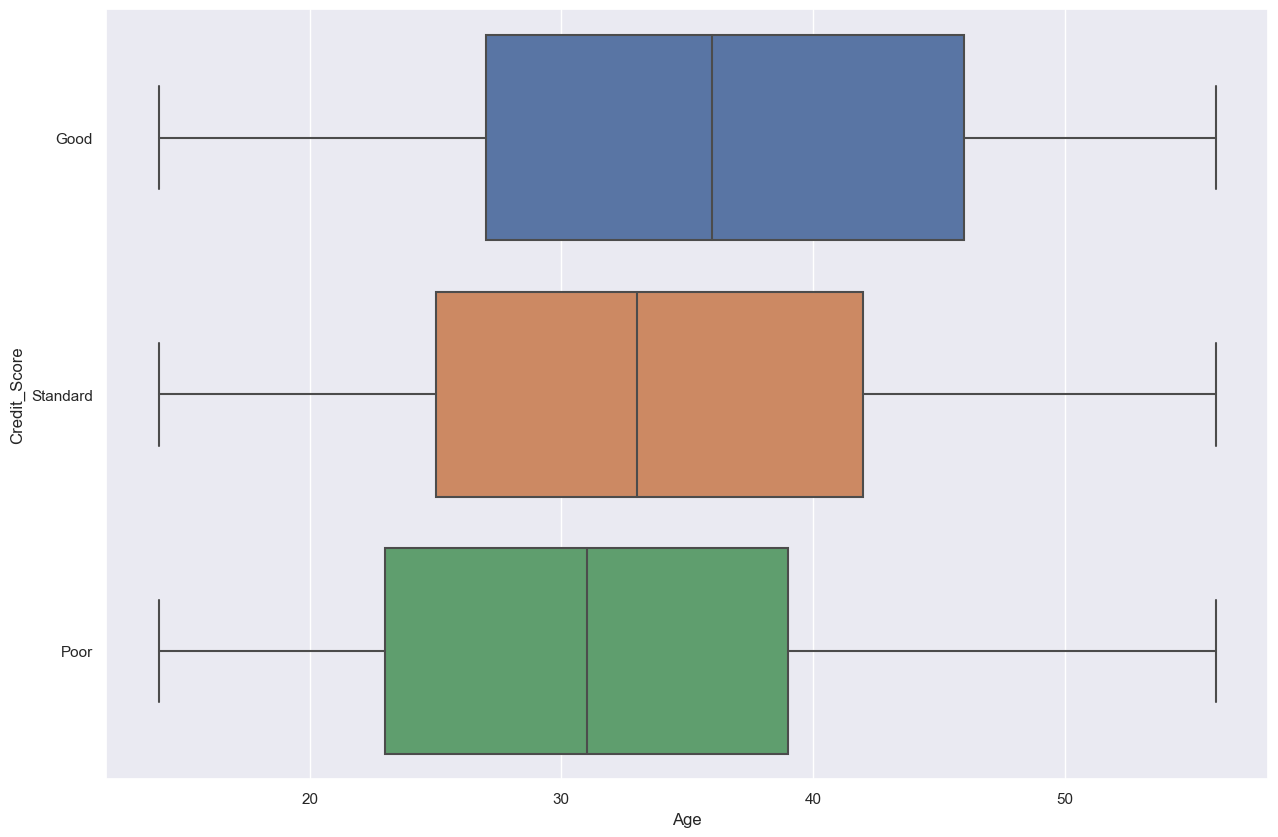

In [44]:
sns.boxplot(train_data,x='Age',y='Credit_Score')

The horizontal box plot displays the age distribution across three credit score categories: Good, Standard, and Poor. The median age for each category is around the middle age range, with similar age distributions, indicating that age may not be a distinguishing factor in credit score classification.

In [45]:
m = {
    "Poor":0,
    "Standard":1,
    "Good":2
}

In [46]:
train_data['Credit_Score'] = train_data['Credit_Score'].map(m)
train_data

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1.0,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",3,7.0,11.27,4.0,1.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,3392,2.0,23,Scientist,19114.12,2295.058333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",18,19.0,11.27,4.0,2.0,809.98,31.944960,191.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2
2,3392,3.0,33,Scientist,19114.12,2295.058333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",3,7.0,9.40,4.0,2.0,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2
3,3392,4.0,23,Scientist,19114.12,2295.058333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",5,4.0,6.27,4.0,2.0,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2
4,3392,5.0,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",6,19.0,11.27,4.0,2.0,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4.0,25,Mechanic,39628.99,3359.415833,4,6,7,2,"auto loan,student loan",23,7.0,11.50,3.0,1.0,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,0
99996,37932,5.0,25,Mechanic,39628.99,3359.415833,4,6,7,2,"auto loan,student loan",18,7.0,11.50,3.0,1.0,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,0
99997,37932,6.0,25,Mechanic,39628.99,3359.415833,4,6,13,2,"auto loan,student loan",27,6.0,11.50,3.0,2.0,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,0
99998,37932,7.0,25,Mechanic,39628.99,3359.415833,4,6,7,2,"auto loan,student loan",20,19.0,11.50,3.0,2.0,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,1


In [47]:
# Convert categorical variables in the train_data DataFrame to dummy/indicator variables using one-hot encoding.
# The get_dummies function from pandas is used for this purpose.
# The drop_first parameter is set to True to drop the first level of each categorical feature to avoid multicollinearity.

df = pd.get_dummies(train_data, drop_first=True)

In [48]:
df.isna().sum()

Customer_ID                                           0
Month                                                 0
Age                                                   0
Annual_Income                                         0
Monthly_Inhand_Salary                                 0
                                                     ..
Payment_Behaviour_High_spent_Medium_value_payments    0
Payment_Behaviour_High_spent_Small_value_payments     0
Payment_Behaviour_Low_spent_Large_value_payments      0
Payment_Behaviour_Low_spent_Medium_value_payments     0
Payment_Behaviour_Low_spent_Small_value_payments      0
Length: 6300, dtype: int64

In [49]:
X, y = df.drop("Credit_Score",axis=1).values , df["Credit_Score"]

In [50]:
y.value_counts(normalize=True)

1    0.53174
0    0.28998
2    0.17828
Name: Credit_Score, dtype: float64

### Logistic Regression

In [51]:
%%time

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming you have X, y defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=68)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1,1.0,10],
    'solver': ['newton-cg','liblinear']
}

# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Create HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring='accuracy', factor=3)

# Fit the halving grid search to the data
halving_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = halving_grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Use the best estimator (model) to make predictions on the test set
best_logreg_model = halving_grid_search.best_estimator_
y_pred = best_logreg_model.predict(X_test_scaled)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'C': 1.0, 'solver': 'newton-cg'}
Accuracy on Test Set: 0.7299333333333333
CPU times: total: 13h 38min 12s
Wall time: 4h 46min 34s


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the Logistic Regression model with the specified hyperparameters
best_logistic_model = LogisticRegression(C=1.0, solver='newton-cg')

# Train the model on the training data
best_logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_logistic = best_logistic_model.predict(X_test_scaled)

# Evaluate accuracy on the test set
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")

# Calculate and print precision, recall, and F1 score
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted') 
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

print(f"Precision: {precision_logistic}")
print(f"Recall: {recall_logistic}")
print(f"F1 Score: {f1_logistic}")

Logistic Regression Accuracy: 0.7299333333333333
Precision: 0.7295067685138507
Recall: 0.7299333333333333
F1 Score: 0.7288408565271886


### K-Nearest Neighbors

In [53]:
%%time

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Assuming you have X, y defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=68)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of neighbors to search through
param_grid = {'n_neighbors': [3, 5, 7]}  # You can adjust the range of values

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(estimator=knn, param_grid=param_grid, cv=5, factor=3)

# Fit the halving grid search to the data
halving_grid_search.fit(X_train_scaled, y_train)

# Get the best parameter value
best_neighbors = halving_grid_search.best_params_['n_neighbors']
print("Best Number of Neighbors:", best_neighbors)

# Use the best model
best_knn_model = halving_grid_search.best_estimator_
best_knn_model.fit(X_train_scaled, y_train)
knn_y_pred = best_knn_model.predict(X_test_scaled)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("KNN Accuracy with Best Neighbors:", knn_accuracy)

Best Number of Neighbors: 3
KNN Accuracy with Best Neighbors: 0.7603333333333333
CPU times: total: 13h 38min 15s
Wall time: 2h 8min 1s


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the KNN model with the specified best number of neighbors
best_knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
best_knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = best_knn_model.predict(X_test_scaled)

# Evaluate accuracy on the test set
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy with Best Neighbors (k=3): {accuracy_knn}")

# Calculate and print precision, recall, and F1 score
precision_knn = precision_score(y_test, y_pred_knn, average='weighted') 
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")

KNN Accuracy with Best Neighbors (k=3): 0.7603333333333333
Precision: 0.7614557043210917
Recall: 0.7603333333333333
F1 Score: 0.7600831248854911


### Decision Tree

In [55]:
%%time

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming you have X, y, and X_scaled defined
# X_scaled is the scaled version of X using StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=68)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a reduced hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20]
}

# Create a DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Create HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', factor=3)

# Fit the halving grid search to the data
halving_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = halving_grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Use the best estimator (model) to make predictions on the test set
best_dt_model = halving_grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test_scaled)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10}
Accuracy on Test Set: 0.7026
CPU times: total: 15min 15s
Wall time: 16min 53s


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the Decision Tree model with the specified hyperparameters
best_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10)

# Train the model on the training data
best_dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Evaluate accuracy on the test set
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Calculate and print precision, recall, and F1 score
precision_dt = precision_score(y_test, y_pred_dt, average='weighted') 
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")

Decision Tree Accuracy: 0.7022666666666667
Precision: 0.7034930242675175
Recall: 0.7022666666666667
F1 Score: 0.7019403865072964


### Random Forest

In [57]:
%%time

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming you have X, y, and X_scaled defined
# X_scaled is the scaled version of X using StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=68)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [5,10,100],
    'max_depth': [None,10,100]
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Create HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', factor=3)

# Fit the halving grid search to the data
halving_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = halving_grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Use the best estimator (model) to make predictions on the test set
best_rf_model = halving_grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Accuracy on Test Set: 0.7827333333333333
CPU times: total: 52min 14s
Wall time: 56min 14s


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=68)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(max_depth=None, n_estimators=100)

# Train the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate accuracy on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")

# Calculate and print precision, recall, and F1 score
precision_rf = precision_score(y_test, y_pred_rf, average='weighted') 
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

Accuracy: 0.7863333333333333
Precision: 0.7858224742821328
Recall: 0.7863333333333333
F1 Score: 0.7855548397074065
